<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

## Carga de imágenes

Se deben otorgar los ``path`` a los archivo, ya sean en el ordenador, o un URLs.

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

### Imagen 1

In [2]:
path1    = 'https://selfgrowth.info/photos/top-landscape-wallpapers-without-copyright/big-landscape-illustrations-HD2616.jpg'
formato2 = 'jpg'

### Imagen 2

In [3]:
path2    = 'https://wallpapercave.com/wp/wp2711831.jpg'
formato1 = 'jpg'

### Carga

Tamaño de la imagen 1: (1080, 1920, 3)
Tamaño de la imagen 2: (1063, 1600, 3)


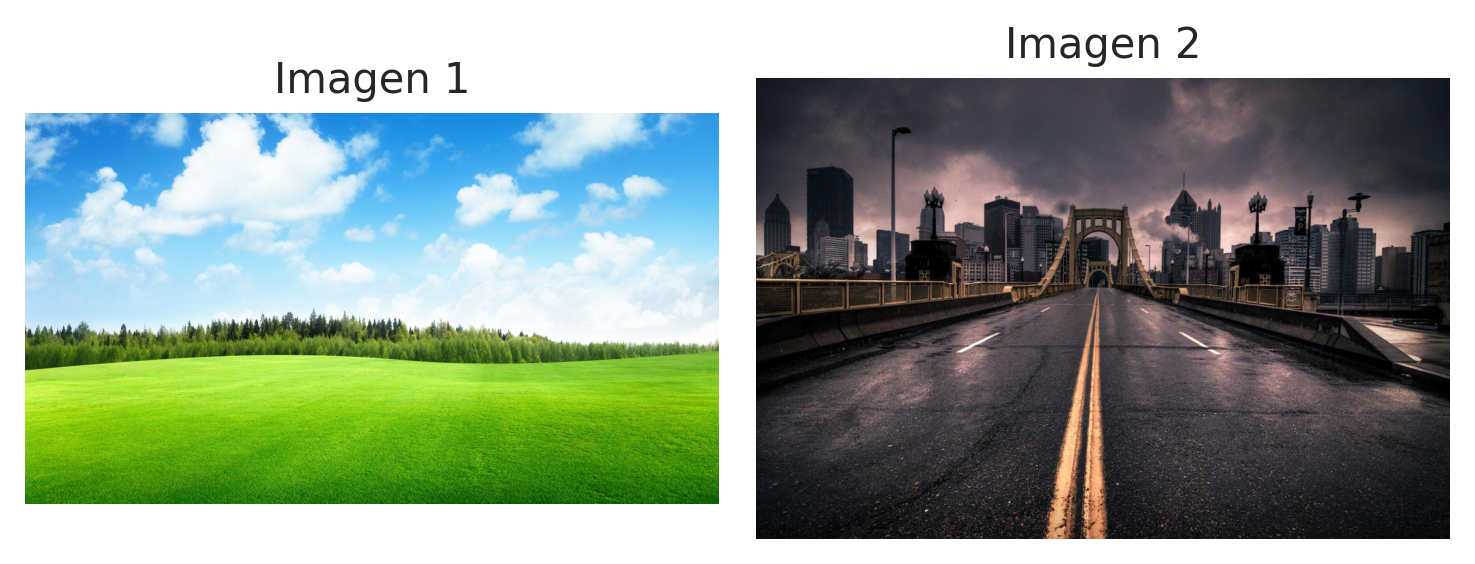

In [4]:
# Si colab...
if in_colab:
    try:
        getoutput("wget "+path1+" -O Imagen1")
        path1 = data_dir = os.path.join(os.getcwd(), 'Imagen1')
    except:
        print('No se pudo descargar la imagen 1.')
    try:
        getoutput("wget "+path2+" -O Imagen2")
        path2 = data_dir = os.path.join(os.getcwd(), 'Imagen2')
    except:
        print('No se pudo descargar la imagen 2.')

# Cargamos los archivos
img1 = mpimg.imread(path1, format=formato1)
img2 = mpimg.imread(path2, format=formato2)

# Definimos RGB normalizados
if img1.ravel().dtype != float: img1 = img1/255.
if img2.ravel().dtype != float: img2 = img2/255.

print('Tamaño de la imagen 1:', img1.shape)
print('Tamaño de la imagen 2:', img2.shape)
    
# Ploteo
plt.figure(dpi=250)
plt.subplot(1,2,1)
plt.title('Imagen 1')
plt.axis('off')
plt.imshow(img1)
plt.subplot(1,2,2)
plt.title('Imagen 2')
plt.axis('off')
plt.imshow(img2)
plt.tight_layout()
plt.show()

# Pre-Procesado

En esta sección se realizarán las operaciones deseadas, antes de poder realizar operaciones aritméticas. 

Es importante saber que se requiere de forma obligatoria que, al final del preprocesado, ambas imágenes tengan el **mismo tamaño**. De caso contraro, se permitirá realizar corte o rellenado (según se especifique)


_Organización:_

    1) Transformaciones espaciales básicas:
        - Corte (Definiendo límites de escala de píxeles (según su eje), respecto a la esquina inferior izquierda)
        - Inversión de ejes (x , y)
        - Rotación (90° antihorario)
    2) Igualación de tamaño


## Transformaciones espaciales básicas

### Imagen 1

In [5]:
# Parámetros
x_min = 0.1
x_max = 0.95
y_min = 0
y_max = 0.9
x_inv = True
y_inv = False
rot   = False

# Edición
img1_t = Transform_IMG(img1,
                       x_min=x_min, x_max=x_max,
                       y_min=y_min, y_max=y_max, 
                       x_inv=x_inv, y_inv=y_inv,
                       rot=rot)

### Imagen 2

In [6]:
# Parámetros
x_min = 0.01
x_max = 0.94
y_min = 0
y_max = 0.95
x_inv = False
y_inv = True
rot   = False

# Edición
img2_t = Transform_IMG(img2,
                       x_min=x_min, x_max=x_max,
                       y_min=y_min, y_max=y_max, 
                       x_inv=x_inv, y_inv=y_inv,
                       rot=rot)

### Plot

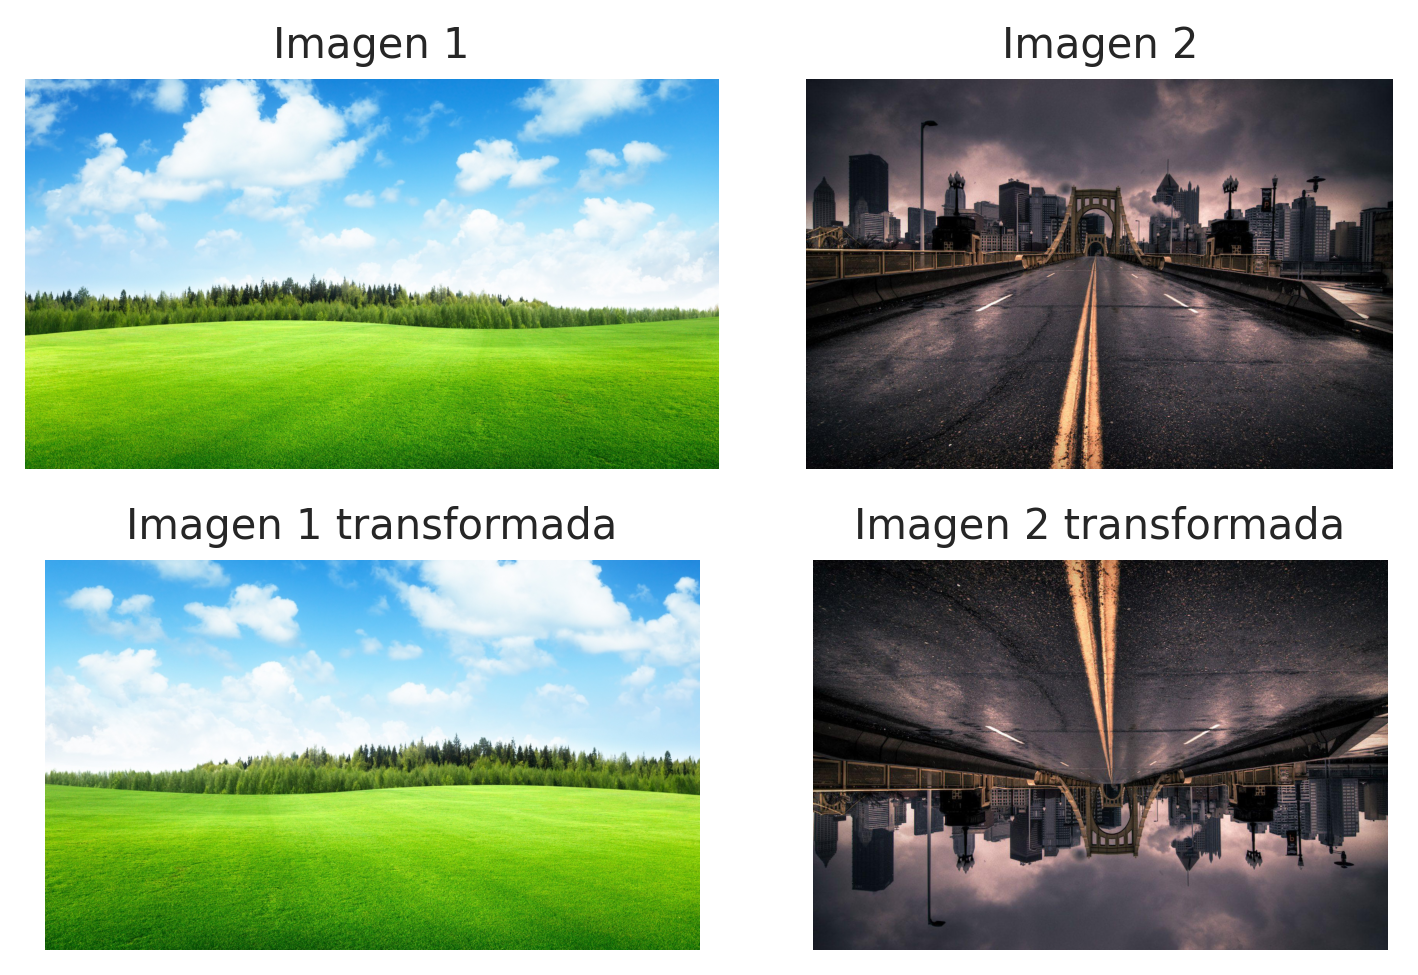

In [7]:
plt.figure(dpi=250)
plt.subplot(2,2,1)
plt.title('Imagen 1')
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.title('Imagen 2')
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,3)
plt.title('Imagen 1 transformada')
plt.axis('off')
plt.imshow(img1_t)
plt.subplot(2,2,4)
plt.title('Imagen 2 transformada')
plt.axis('off')
plt.imshow(img2_t)
plt.tight_layout()
plt.show()

## Seteo de tamaño

Ambas imágenes deben ser del mismo tamaño para realizar las operaciones.

EL proceso será el siguiente:

    1) Ancho/Alto
        - Se selecciona (entre las 2 imágenes) cuál será el Ancho y el Alto de ambas. (Ej.: Ancho de Imagen 1, Alto de Imagen 2)
    2) Cambio de tamaño (Opcional)
        - Si se quiere, se aumenta/disminye el tamaño de cada image, hasta alcancar el Ancho/Alto definido. Se mantiene el aspecto (ratio).
    3) Rellenado/Corte
        - En caso de aún existir diferencia de tamaños, se permite:
            a) Cortar la sección extra de una imagen si esta se excede
            b) Rellenar la sección faltante con algún color RGB si esta "se queda chica".
            
Para más información sobre los parámetros de edición, ejecutar: ``Resize_IMG?`` y/o ``Resize2IMGs?``

In [8]:
# Resize_IMG?
# Resize2IMGs?

In [9]:
print('Tamaño de la imagen 1:', img1_t.shape)
print('Tamaño de la imagen 2:', img2_t.shape)

Tamaño de la imagen 1: (973, 1632, 3)
Tamaño de la imagen 2: (1010, 1488, 3)


### Ancho/Alto

In [10]:
height = 'first'  # 'first' refiere al ancho/alto de la imagen 1 
width  = 'second' # 'second' refiere al ancho/alto de la imagen 2

### Edición

#### Imagen 1

In [11]:
resize_1 = False
crop_1   = True
fill_1   = 'red'

#### Imagen 2

In [12]:
resize_2 = True
crop_2   = False
fill_2   = [1,120,18]

#### Edición

In [13]:
verb=False

img1_e, img2_e = Resize2IMGs(img1_t, img2_t,
                             width=width, height=height,
                             resize_1=resize_1, resize_2=resize_2,
                             crop_1=crop_1, crop_2=crop_2,
                             fill_1=fill_1, fill_2=fill_2, 
                             verb=verb)

#### Plot

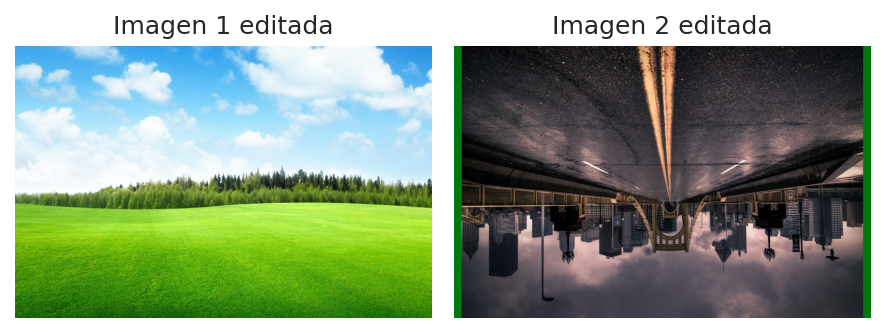

In [14]:
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.title('Imagen 1 editada')
plt.axis('off')
plt.imshow(img1_e)
plt.subplot(1,2,2)
plt.title('Imagen 2 editada')
plt.axis('off')
plt.imshow(img2_e)
plt.tight_layout()
plt.show()

### Guardado

#### Imagen 1

In [15]:
nombre1  = 'Img1_editada'
formato1 = 'jpg'

if not in_colab:
    IMG = Image.fromarray((img1_e*255).astype('uint8'))
    IMG.save(nombre1+'.'+formato1)

#### Imagen 2

In [16]:
nombre2  = 'Img2_editada'
formato2 = 'jpg'

if not in_colab:
    IMG = Image.fromarray((img2_e*255).astype('uint8'))
    IMG.save(nombre2+'.'+formato2)

### Check

In [17]:
if img1_e.shape != img2_e.shape:
    print('Los tamaños son distintos. No se podrán realizar operaciones algebraicas.')
    print('Aplique otra edición a alguna imagen para obtener el mismo tamaño en ambas.')

# Álgebra

Las operaciones (píxel a píxel) disponibles son:

    - suma    ['suma',      'sum'       ]
    - resta   ['resta',     'subtract'  ]
    - lighter ['mas_claro', 'if_lighter']
    - darker  ['mas_oscuro','if_darker' ]
Los formatos (cierres) disponible son:

    - RGB clampeado ['RGB_truncado', 'RGB_clamp'  ]
    - RGB promedio  ['RGB_promedio', 'RGB_average']
    - YIQ clampeado ['YIQ_truncado', 'YIQ_clamp'  ] 
    - YIQ promedio  ['YIQ_promedio', 'YIQ_average ]
   
Nota: Al operar en el espacio YIQ, en TODOS los casos se termina la operación clampeando las 3 componentes en sus respectivos límites.

Para más información, ejecute ``Algebra_IMGs?``

In [18]:
# Algebra_IMGs?

## Operación

In [19]:
operation = 'suma'
formato   = 'YIQ_average'

img_op = Algebra_IMGs(img1_e, img2_e,
                      op=operation, fo=formato,
                      verb=True)

Se ha transformado de YIQ a RGB
Se realizó la operación: suma 
	utilizando el ciere: YIQ_average


## Ploteo

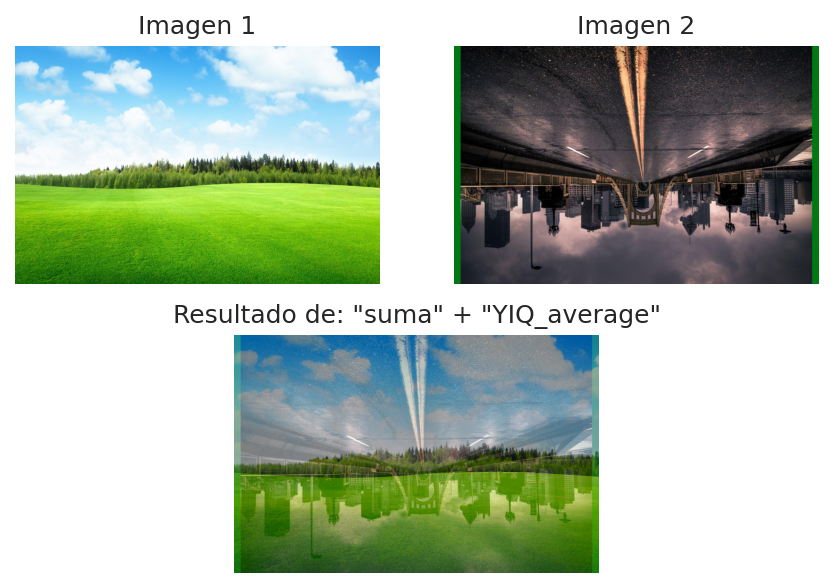

In [20]:
fig  = plt.figure(dpi=150)
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

fig1 = fig.add_subplot(grid[0, 0])
fig1.imshow(img1_e)
fig1.axis('off')
fig1.set_title('Imagen 1')
fig2 = fig.add_subplot(grid[0, 1])
fig2.imshow(img2_e)
fig2.axis('off')
fig2.set_title('Imagen 2')
fig3 = fig.add_subplot(grid[1, :])
fig3.imshow(img_op)
fig3.axis('off')
fig3.set_title('Resultado de: "' + operation +
               '" + "' + formato +'"')
grid.tight_layout(fig)
plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [21]:
nombre  = 'Img_operada'
formato = 'jpg'

if not in_colab:
    RGB_op = (img_op*255.).astype('uint8')
    IMG    = Image.fromarray(RGB_op)
    IMG.save(nombre+'.'+formato)